### IS727272 - Cordero Hernández, Marco Ricardo

Utilizar el dataset: https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction, y hacer los mismos pasos. 

NOTA: La salida es Appliances en la columna 2, y borrar la columna de fechas de la columna 1.

In [1]:
# Import libraries
import math
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df_appl = pd.read_csv('./Datasets/energydata_complete.csv')
df_appl.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
# Verify that there are not null values
df_appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [4]:
# Drop the first column

df_appl = df_appl.drop(columns = ['date'])

In [5]:
# Convert to numpy matrix the attributes and the ouput 'cnt'
dataset = np.array(df_appl)
m, n = np.shape(dataset)
x = dataset[:, 1:]
y = dataset[:, 0]

# Reshape the output
y = y.reshape(m, 1)
print('X shape: ', np.shape(x), 'Y shape: ', np.shape(y))

X shape:  (19735, 27) Y shape:  (19735, 1)


In [6]:
# Add the columns of number 1

def addones(X):
    X1 = np.array(X)
    m, n = np.shape(X1)
    ones = np.ones((m, 1))
    X1 = np.concatenate((ones, X1), axis = 1)
    
    return X1

x = addones(x)

In [7]:
# Split the dataset into Training and Testing sets, test size of 33%, and random_state= 1

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 1)
print('Shape of Training data: ', np.shape(X_train), np.shape(y_train))
print('Shape of Testing data: ', np.shape(X_test), np.shape(y_test))

Shape of Training data:  (13222, 28) (13222, 1)
Shape of Testing data:  (6513, 28) (6513, 1)


## 2. Normal Linear Regression

In [8]:
# Using the xTrain and yTrain (Training dataset) and Linear Regression function from sklearn library, obtain the model (W's). 
# Then make predictions using the Testing dataset, and obtain the  𝑅2  score of your predictions.

from sklearn.linear_model import LinearRegression
# Fit the data to training dataset
reg = LinearRegression().fit(X_train, y_train)

# Obtain and print the score 
Costo = reg.score(X_test, y_test)
print(f'Error (R2): {Costo}')

# Obtain and print the W's coefficients
w = reg.coef_
print(f'W: {w}')

# Obtain and print the intercept
intercepto = reg.intercept_
print(f'W0: {intercepto}')

# Add the intercept value to the W's array and print W
w[0][0] = intercepto
print(w)

Error (R2): 0.17032081146949007
W: [[-1.10518077e-15  2.05568051e+00 -3.00924473e-01  1.49398991e+01
  -1.65328093e+01 -1.27615630e+01  2.59004906e+01  4.54023922e+00
  -4.25449341e+00 -1.23671523e+00  1.61232499e+00  1.37831458e-01
   7.33314001e+00  3.86001698e-01  1.74885310e+00 -1.45939553e+00
   6.78016410e+00 -4.44206073e+00 -1.62275982e+01 -9.55860683e-01
  -1.17275308e+01  1.25875044e-01 -1.42162351e+00  1.79676236e+00
   1.32522389e-01  6.43724474e+00 -1.01180123e-03 -1.01180123e-03]]
W0: [93.40705406]
[[ 9.34070541e+01  2.05568051e+00 -3.00924473e-01  1.49398991e+01
  -1.65328093e+01 -1.27615630e+01  2.59004906e+01  4.54023922e+00
  -4.25449341e+00 -1.23671523e+00  1.61232499e+00  1.37831458e-01
   7.33314001e+00  3.86001698e-01  1.74885310e+00 -1.45939553e+00
   6.78016410e+00 -4.44206073e+00 -1.62275982e+01 -9.55860683e-01
  -1.17275308e+01  1.25875044e-01 -1.42162351e+00  1.79676236e+00
   1.32522389e-01  6.43724474e+00 -1.01180123e-03 -1.01180123e-03]]


## Implement $R^2$ Score

$$R^2 = 1 - \frac{\sum(y_i - \hat{y}_i)^2}{\sum(y_i - \bar{y})^2 }$$

In [9]:
def r2(Y, Yt):
    
    error = Y - Yt
    varianza = (Y - np.average(Y)) ** 2
    cost = 1 - (np.sum(error ** 2)) / np.sum(varianza)
    
    return cost
                
# Predictions for Testing dataset
yt = np.dot(w, X_test.T).T
print(np.shape(yt))

# Obtain and print the R2 score
costo = r2(y_test, yt)
print(costo)

(6513, 1)
0.17032081146949007


## 3. Gradient Descent with Regularization (Ridge)

Cost function for Gradient Descent Regularized:
$$
J(w) = \frac{1}{2m}\big[\sum_{i=1}^{m}(\hat y^{(i)}-y^{(i)})^2+\lambda\sum_{j=1}^{n}w_j^2 \big]
$$

W's update for GD Regularized:
$$
w_0 = w_0 - \alpha \frac{1}{m}\sum_{i=1}^{m}(\hat y^{(i)}-y^{(i)})x_0^{(i)}
$$
$$
w_j = w_j - \alpha \frac{1}{m} \big [ \sum_{i=1}^{m}(\hat y^{(i)}-y^{(i)})x_j^{(i)} + \frac{\lambda}{m}w_j \big ]
$$

In [10]:
# Linear regression con regularizacion "Ridge"
# Using Ridge function from sklearn library, obtain the model (W's) and then make predictions using the Testing dataset
# and obtain the  𝑅2  score of your predictions.

from sklearn.linear_model import Ridge

# Define the clf method using alpha = 10
clf = Ridge(alpha = 10.0)

# Fit to the training dataset
ridge = clf.fit(X_train, y_train)

# Obtain and print the score 
Score2 = ridge.score(X_test, y_test)
print(f'R2: {Score2}')

# Obtain and print the W's coefficients
w2 = ridge.coef_
print(w2)

# Obtain and print the intercept
intercepto2 = ridge.intercept_
print(intercepto2)

# Add the intercept value to the W's array and print W
w2[0][0] = intercepto2
print(w2)

R2: 0.17032411671596948
[[ 0.00000000e+00  2.05699362e+00 -3.31151108e-01  1.49107557e+01
  -1.64296080e+01 -1.27134085e+01  2.58461113e+01  4.53593634e+00
  -4.26951878e+00 -1.24224359e+00  1.57847881e+00  1.38209176e-01
   7.30566374e+00  3.84810933e-01  1.71715758e+00 -1.45864739e+00
   6.76472262e+00 -4.44014856e+00 -1.61348597e+01 -9.58598362e-01
  -1.16399749e+01  1.25948086e-01 -1.40828610e+00  1.80024098e+00
   1.32353936e-01  6.36331912e+00 -1.02621353e-03 -1.02621354e-03]]
[91.70400894]
[[ 9.17040089e+01  2.05699362e+00 -3.31151108e-01  1.49107557e+01
  -1.64296080e+01 -1.27134085e+01  2.58461113e+01  4.53593634e+00
  -4.26951878e+00 -1.24224359e+00  1.57847881e+00  1.38209176e-01
   7.30566374e+00  3.84810933e-01  1.71715758e+00 -1.45864739e+00
   6.76472262e+00 -4.44014856e+00 -1.61348597e+01 -9.58598362e-01
  -1.16399749e+01  1.25948086e-01 -1.40828610e+00  1.80024098e+00
   1.32353936e-01  6.36331912e+00 -1.02621353e-03 -1.02621354e-03]]


In [11]:
# Predictions for Testing dataset for Ridge algorithm
yt2 = np.dot(w2, X_test.T).T
print(np.shape(yt2))

# Obtain and print the R2 score for Ridge Algorithm
costo2 = r2(y_test, yt2)
print(costo2)

(6513, 1)
0.17032411671596948


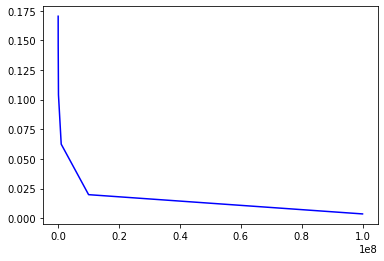

In [12]:
#Incrementar el valor de alfa de forma logaritmica: 10, 100, 1000, 10000, 100000, 1e6, 1e7
#Graficar el comportamiento del score del ridge para cada valor de alpha

alphas = [10, 100, 1000, 10000, 100000, 1e6, 1e7, 1e8]
J = []


for a in alphas:
    # Define the clf method using distinct alphas
    clf = Ridge(alpha = a)

    # Fit to the training dataset
    ridge = clf.fit(X_train, y_train)

    # Obtain and print the score 
    Score = ridge.score(X_test, y_test)

    # Obtain and print the W's coefficients
    w = ridge.coef_

    # Obtain and print the intercept
    intercepto = ridge.intercept_

    # Add the intercept value to the W's array and print W
    w[0][0] = intercepto
    
    # Predictions for Testing dataset for Ridge algorithm
    yt = np.dot(w, X_test.T).T

    # Obtain and print the R2 score for Ridge Algorithm
    costo = r2(y_test, yt)
    
    J.append(costo)

    
plt.plot(alphas, J, 'b')